# Case of Use for NBC (Naive Bayes Classifier) with job portal JobTeaser

First, the important packages are imported

In [68]:
import sys
import pandas as pd
from pandas import read_excel, DataFrame, concat
from numpy import where, log
import requests
import time
from bs4 import BeautifulSoup
from datetime import datetime, timedelta, date

From previous iterations, the bot for Jobteaser was copied. It has to be corrected, due to the continuous updates that are being made by the owners to the webpage to achieve better user experience. That means, the HTML of the web page might be continuously changing (and was the case for this one).

After updating the bot, it was possible to run freely again.

#### Disclaimer
For this iteration, a stopper was manually put into the bot. So, instead of botting all the possible and available webpages for the filter options, it will stop at page 3, so to not use much time.

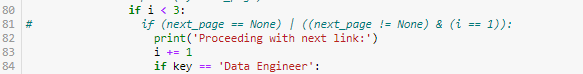

In [2]:
class bot_jobteaser:
    def __init__(self):
        
        # link Data Engineer
        linkDE = 'https://www.jobteaser.com/en/job-offers?locale=en&q=Data+Engineer&abroad_only=false&location=Germany&page=1'

        # Data Analyst
        linkDA = 'https://www.jobteaser.com/en/job-offers?locale=en&q=Data+Analyst&abroad_only=false&location=Germany&page=1'

        links_to_bot = {'Data Engineer':linkDE, 
                        'Data Analyst':linkDA
                       }

        total_df = pd.DataFrame(columns = ['date_of_extraction','websource','search_job','title', 'company', 
                                           'location', 'duration','date_of_posting','reference','other_info',
                                           'compagination'
                                          ])

        for key in links_to_bot:
            print(f'Starting with : {key}')
            data_link = self.requests_jobteaser(key = key, url = links_to_bot[key])
            total_df = pd.concat(objs = [total_df, data_link], ignore_index = True)
            
        self.final_df = total_df.copy()
        
#         date_today_text = date.today().strftime('%Y%m%d')
#         total_df.to_excel(f'{total_df}_job_listings_jobteaser.xlsx')
            
        
        
    def requests_jobteaser(self, key, url):
        # Important headers to make this requests instance work
        headers = {
            'Origin':'https://www.jobteaser.com',
            'Referer':'https://www.jobteaser.com/',
            'Sec-Ch-Ua':'"Google Chrome";v="123", "Not:A-Brand";v="8", "Chromium";v="123"',
            'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36'
        }

        i = 1
        data = []
        while True:
            response = requests.get(url, headers = headers)
            
            if response:
                soup = BeautifulSoup(response.content, 'html.parser')
                
                job_listings = soup.find('ul',class_='Results_main__fyiWs')

                for job in job_listings:
                    company_name = job.find('p', class_='sk-Text sk-Typography_main__I32O9 JobAdCard_companyName__Ieoi3 sk-Typography_body1__rvFYv sk-Typography_regular__a_y2X').text
                    card_title = job.find('h3', class_='sk-Typography_main__I32O9 sk-Typography_title3__c40PS sk-Typography_bold__ICdus JobAdCard_title__vdhrP').text
                    link = job.find('a', class_='JobAdCard_link__n5lkb').get('href')
                    duration = job.find('span', class_='sk-Text sk-Typography_main__I32O9 sk-Typography_body1__rvFYv sk-Typography_regular__a_y2X').text
                    location = job.find('p', class_='sk-Text sk-Typography_main__I32O9 sk-Typography_body1__rvFYv sk-Typography_regular__a_y2X').text
                    if job.find('span', class_ = 'sk-Badge_label__f1crk') is None:
                        posting_time = job.find('time', class_ = 'sk-Text sk-Typography_main__I32O9 sk-Typography_caption1__sl2pb sk-Typography_regular__a_y2X').text
                    else:
                        posting_time = job.find('span', class_ = 'sk-Badge_label__f1crk').text

                    data.append({'date_of_extraction':str(date.today()),
                                 'websource': 'JobTeaser',
                                 'search_job': key,
                                 'title': card_title, 
                                 'company': company_name, 
                                 'location': location,
                                 'duration': duration,
                                 'date_of_posting':posting_time,
                                 'other_info':'--',
                                 'reference': 'https://www.jobteaser.com'+link,
                                 'compagination': i
                                })

                print(f'It. {i} is done!')
                time.sleep(3)
                # print(soup.find('button', attrs={'disabled': True}))
                next_page = soup.find('button', attrs={'disabled': True})
                # print(next_page == None)
                # print(i, next_page)
                if i < 3:
#                 if (next_page == None) | ((next_page != None) & (i == 1)):
                    print('Proceeding with next link:')
                    i += 1
                    if key == 'Data Engineer':
                        url = f'https://www.jobteaser.com/en/job-offers?locale=en&q=Data+Engineer&abroad_only=false&location=Germany&page={i}'
                    else:
                        url = f'https://www.jobteaser.com/en/job-offers?locale=en&q=Data+Analyst&abroad_only=false&location=Germany&page={i}'
                    print(url)
                    time.sleep(3)
                else:
                    print('Ran out of pages!')
                    break
            else:
                print(f'Request not working at it. {i}')
                break

        df = pd.DataFrame(data)
        return df
a = bot_jobteaser()

Starting with : Data Engineer
It. 1 is done!
Proceeding with next link:
https://www.jobteaser.com/en/job-offers?locale=en&q=Data+Engineer&abroad_only=false&location=Germany&page=2
It. 2 is done!
Proceeding with next link:
https://www.jobteaser.com/en/job-offers?locale=en&q=Data+Engineer&abroad_only=false&location=Germany&page=3
It. 3 is done!
Ran out of pages!
Starting with : Data Analyst
It. 1 is done!
Proceeding with next link:
https://www.jobteaser.com/en/job-offers?locale=en&q=Data+Analyst&abroad_only=false&location=Germany&page=2
It. 2 is done!
Proceeding with next link:
https://www.jobteaser.com/en/job-offers?locale=en&q=Data+Analyst&abroad_only=false&location=Germany&page=3
It. 3 is done!
Ran out of pages!


The final dataframe of information is now an attribute of the class

In [6]:
df_jobs_jt = a.final_df
df_jobs_jt.head(3)

,date_of_extraction,websource,search_job,title,company,location,duration,date_of_posting,reference,other_info,compagination
0,2024-05-12,JobTeaser,Data Engineer,Field Applications Engineer Intern (m/f/d) in ...,Texas Instruments,"Nuremberg, Germany",Internship 4 to 6 months,"Thursday, May 9 at 08:09",https://www.jobteaser.com/en/job-offers/fae897...,--,1
1,2024-05-12,JobTeaser,Data Engineer,Analog IC Design Engineer in High Speed Data C...,Texas Instruments,"Freising, Germany",Internship 4 to 6 months,"Wednesday, May 8 at 08:11",https://www.jobteaser.com/en/job-offers/9aae90...,--,1
2,2024-05-12,JobTeaser,Data Engineer,PhD Candidate & Associate Scientist for Sustai...,ABB AG,"Mannheim, Germany",Thesis 25 to 36 months,"Thursday, May 9 at 07:14",https://www.jobteaser.com/en/job-offers/32cb4f...,--,1


As the regular process would just iterate over all of the links found in the "reference" column of the dataframe, for the sake of the example, we will just focus on the first one.

In [62]:
df_jobs_jt['reference'][0]

'https://www.jobteaser.com/en/job-offers/fae8971d-1b97-436e-9b09-4fa79cca9016-texas-instruments-field-applications-engineer-intern-m-f-d-in-munich-or-nurnberg'

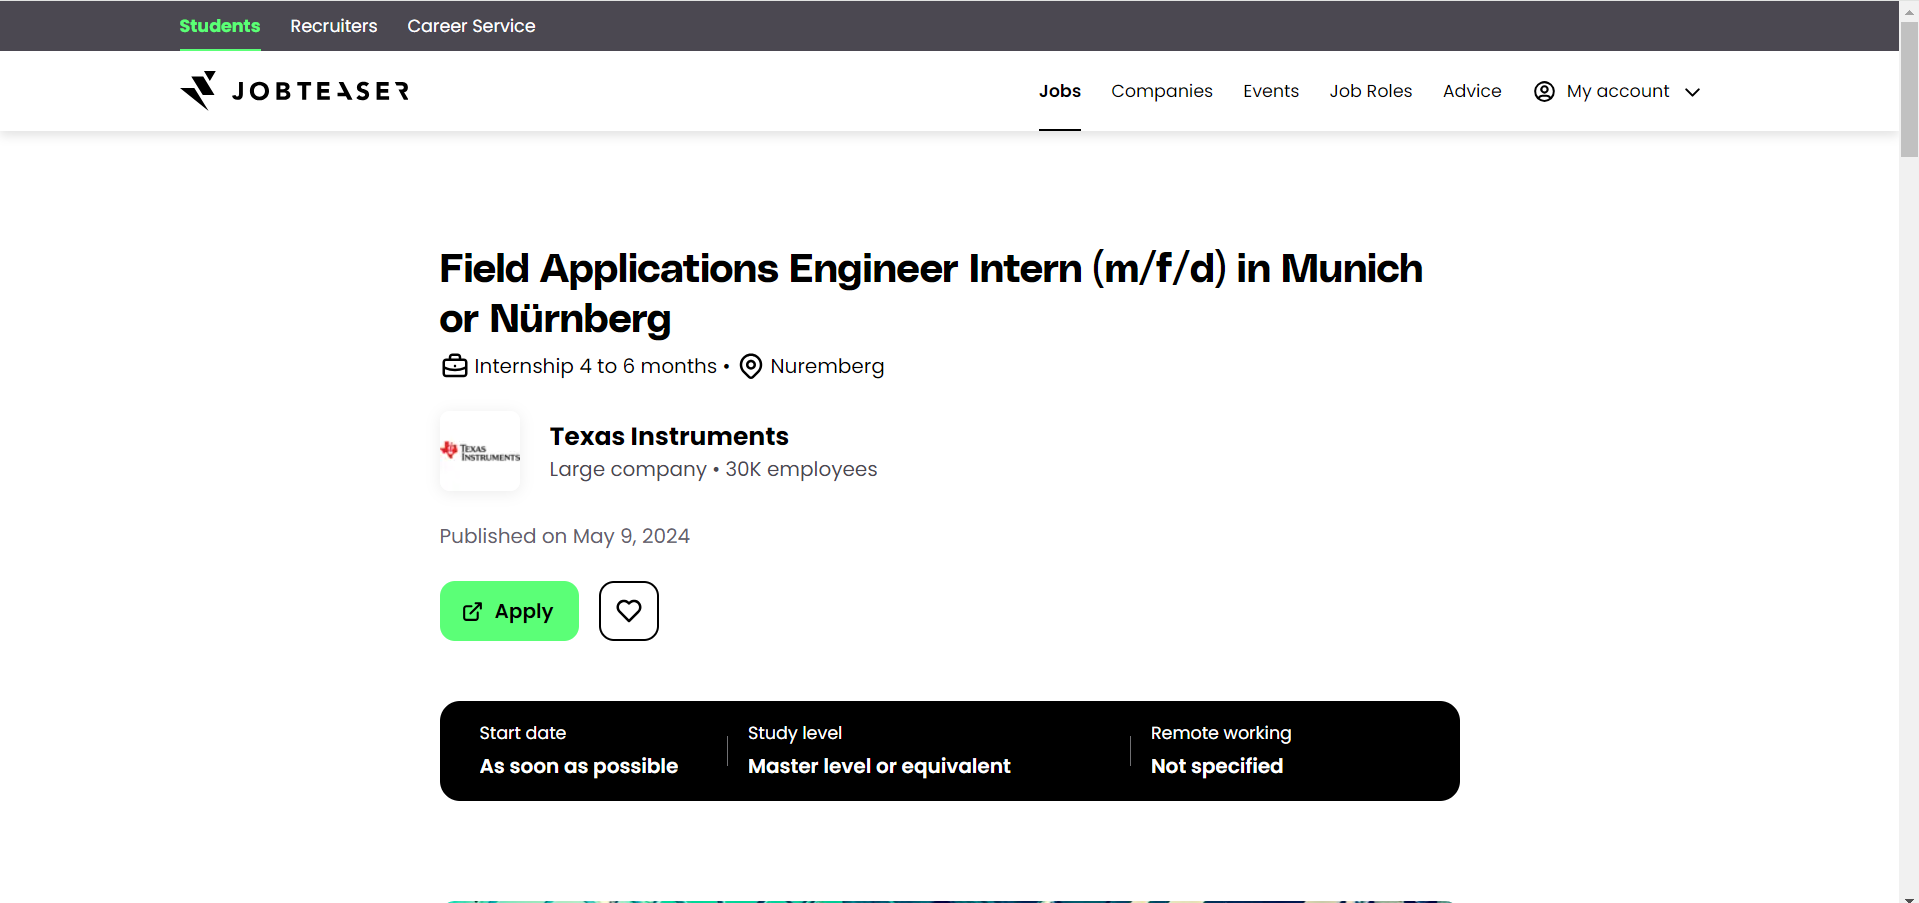

Also, for the sake of the example, we will just focus on finding a specific concepto that we might be interested in. This can be further extrapolated to a list of concepts to be found.

In [66]:
relevant_concepts = 'german'
found_concept = False

A new bot (that MUST be specific for each web page, as each web page has its own HTML), is instanced, to search through the source code, looking for the concept we specified before.

In [67]:
headers = {
    'Origin':'https://www.jobteaser.com',
    'Referer':'https://www.jobteaser.com/',
    'Sec-Ch-Ua':'"Google Chrome";v="123", "Not:A-Brand";v="8", "Chromium";v="123"',
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36'
}


for detail_link in df_jobs_jt['reference']:
    print(detail_link)
    response = requests.get(detail_link, headers = headers)

    if response: # first we try if the connection is possible
        soup = BeautifulSoup(response.content, 'html.parser')

        # we find and soup the details
        job_details = soup.find('div',class_='sk-Text sk-Typography_main__I32O9 Description_content__Ais4T sk-Typography_body1__rvFYv sk-Typography_regular__a_y2X')
        all_lines = job_details.find_all('li')
        
        # we iterate in each line of data
        for line_of_info in all_lines:
            # as each line of data may contain more than one info (ex. german and english in same line), we pre process
            pre_processed_line = line_of_info.text.lower().replace(',','.')
            pre_processed_line = pre_processed_line.replace(';','.').split('.')
            for pre_processed_bit in pre_processed_line:
                if relevant_concepts in pre_processed_bit:
                    to_classify = pre_processed_bit
                    found_concept = True
                    print(f'Found! : \n{saved_line}')
        if not found_concept:
            print(f'Job posting does not mention {relevant_concepts}')
    else:
        print('Something went wrong the the link.')
        
    sys.exit() # to cut it after first link

https://www.jobteaser.com/en/job-offers/fae8971d-1b97-436e-9b09-4fa79cca9016-texas-instruments-field-applications-engineer-intern-m-f-d-in-munich-or-nurnberg
Found! : 
fluent in german and english


SystemExit: 

Again the code is forcefully stopped, just for the sake of the example, as it found the concept we were looking for.

Next step is uploading the ddbb generated (manually, of course) to help the NBC decide whether the concept found is a "must" or a "nice to have", given the context where it was found.

### Important!!
Remember to change the link accordingly, so that the read_excel function of pandas manages to find the excel.

In [58]:
link = ''
df = read_excel(link)

df['prior'] = 0
for possible_classes in df['class'].unique():
    prior = len(df[df['class'] == possible_classes]) / len(df)
    df['prior'] = where(df['class'] == possible_classes,
                        prior,
                        df['prior']
                       )
    
df['log_prior'] = log(df['prior'])

In [59]:
bag_of_words = []
for phrase in df['tokenization']:
        for word in phrase.split(' '):
            bag_of_words.append(word)
bag_V = set(bag_of_words)

bag_of_words_must = []
for phrase in df[df['class'] == 'must']['tokenization']:
        for word in phrase.split(' '):
            bag_of_words_must.append(word)
            
bag_of_words_nice = []
for phrase in df[df['class'] == 'nice']['tokenization']:
        for word in phrase.split(' '):
            bag_of_words_nice.append(word)

In [60]:
df_words = DataFrame({'word':list(to_classify.split(' '))})

for possible_classes in df['class'].unique():
    df_words[possible_classes] = 0
    
#### with the following loop, we count how much times the word is in each class
for possible_classes in df['class'].unique():
    df_aux = df[df['class'] == possible_classes].reset_index(drop = True)
    for analyse in df_words['word']:
        for phrase in df_aux['tokenization']:
            if analyse in phrase:
                index_of_word = df_words[df_words['word'] == analyse].index[0]
                df_words.at[index_of_word,possible_classes] = df_words.at[index_of_word,possible_classes] + 1
            else:
                pass
            
#### as we know, the full numerator of the algorithm is the value + 1    
for col in df['class'].unique():
    df_words[f'num_class_{col}'] = df_words[col] + 1

#### finally, we know that the denominator is the total of words (including repetitions) of the words of given class,
# + the set of all words (distinct), regardless of the class
df_words['den_class_must'] = len(bag_of_words_must) + len(bag_V)
df_words['den_class_nice'] = len(bag_of_words_nice) + len(bag_V)

#### we calculate the log likelihood
for col in df['class'].unique():
    df_words[f'log_likelihood_{col}'] = log(df_words[f'num_class_{col}'] / df_words[f'den_class_{col}'])

In [61]:
dicc_possibilities = {}
for possible in df['class'].unique():
    log_like = df_words[f'log_likelihood_{possible}'].sum() + df[df['class'] == possible]['log_prior'].sum()
    dicc_possibilities[possible] = log_like
    
class_winner = ''
class_log_like = -999
for key in dicc_possibilities:
    if dicc_possibilities[key] > class_log_like:
        class_winner = key
        class_log_like = dicc_possibilities[key]
print(f'The winner is {class_winner}')

The winner is must


### Important Considerations:
1. NBC considers that order of words does not matter
2. NBC considers that words are independent from each other